<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import seaborn as sns
import pandas as pd

def display(ranked_wordlist, n_samples = 15):
  sns.barplot(x="frequency", y="words", data=pd.DataFrame({"frequency":[x for x,_ in ranked_wordlist[:n_samples]], "words":[x for _,x in ranked_wordlist[:n_samples]]}))
  
def compare(ranked_wordlist_a, ranked_wordlist_b, method_a = "a", method_b = "b", n_samples = 15):
  d_i = pd.DataFrame({
    "method":[method_a]*n_samples + [method_b]*n_samples,
    "frequency":[x for x,_ in ranked_wordlist_a[:n_samples]] + [x for x,_ in ranked_wordlist_b[:n_samples]],
    "words":[x for _,x in ranked_wordlist_a[:n_samples]] + [x for _,x in ranked_wordlist_b[:n_samples]], 
  })
  sns.factorplot("frequency", "words", col="method", data=d_i, kind="bar")

# Get some raw text

In [0]:
import requests
from bs4 import BeautifulSoup as bs

def scrape(url):
  soup = bs(requests.get(url, headers = {'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",'referrer': 'https://google.com'}).text, "html.parser")
  return '\n'.join([dom.text for dom in soup.find_all(['title','h1','h2','h3','h4','h5','h6','p'])])

In [61]:
example_document = scrape("http://www.literatureproject.com/alice/alice_7.htm")

print(example_document[:300])

7 : CHAPTER VII


 
Prev 
| Next 
| Contents 
CHAPTER VII
A Mad Tea-Party
              

  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a c


# Frequency of Terms

In [0]:
from collections import defaultdict

def rank_words(document):
  counter = defaultdict(int)
  for word in document.split():
      counter[word] += 1
  return sorted(zip(counter.values(), counter.keys()), reverse = True)

In [0]:
ranked_raw = rank_words(example_document)
display(ranked_raw)

# Strip Punctuation 

In [0]:
def clean(text):
  return ' '.join(''.join(letter if ord('a') <= ord(letter.lower()) <= ord('z') or letter.isdigit() else ' ' for letter in text).split())

In [0]:
clean_document = clean(example_document)
clean_document[:100]

# Lower Case

In [0]:
clean_document = clean_document.lower()
clean_document[:100]

In [0]:
ranked_clean = rank_words(clean_document)
display(ranked_clean)

In [0]:
compare(ranked_raw,ranked_clean, "raw", "lower case")

# Split Strings

In [0]:
!pip3 install wordninja

In [0]:
from wordninja import split

x = 'itwasadarkandstormynighttherainfellintorrentsexceptatoccasionalintervalswhenitwascheckedbyaviolentgustofwindwhichsweptupthestreetsforitisinlondonthatoursceneliesrattlingalongthehousetopsandfiercelyagitatingthescantyflameofthelampsthatstruggledagainstthedarkness'
' '.join(split(x))

In [0]:
split_document = ' '.join(split(clean_document))
ranked_split = rank_words(split_document)
display(ranked_split)

In [0]:
compare(ranked_clean, ranked_split, "clean", "split")

# Stop Words

In [81]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
stopWords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
nostopwords_document = ' '.join([word for word in split_document.split() if word not in stopWords])
ranked_nostopwords = rank_words(nostopwords_document)
display(ranked_nostopwords)

In [0]:
compare(ranked_split,ranked_nostopwords, "split", "no stop words")

# N Grams
phrases

In [0]:
list(nltk.bigrams("this is a test".split()))

In [0]:
list(nltk.trigrams("this is a test".split()))

In [0]:
from collections import defaultdict
import nltk

def rank_ngrams(document, unigrams = True, bigrams = True, trigrams = True):
  counter = defaultdict(int)
  if unigrams:
    for word in document.split():
        counter[word] += 1
  if bigrams:
    for bigram in nltk.bigrams(document.split()):
      counter[' '.join(bigram)] += 1
  if trigrams:
    for trigram in nltk.trigrams(document.split()):
      counter[' '.join(trigram)] += 1
  return sorted(zip(counter.values(), counter.keys()), reverse = True)

In [0]:
ranked_ngrams = rank_ngrams(nostopwords_document)
display(ranked_ngrams)

In [0]:
compare(ranked_nostopwords, ranked_ngrams, method_b = "n grams")

# Stemming
chopping off suffixes

In [0]:
import nltk
nltk.download('rslp')

from nltk.stem.api import StemmerI
from nltk.stem.regexp import RegexpStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.isri import ISRIStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.rslp import RSLPStemmer

stemmer_sb = SnowballStemmer("english")
stemmer_p = PorterStemmer()
stemmer_l = LancasterStemmer()
stemmer_regex = RegexpStemmer('ing$|s$|e$|able$|ed$|en$',min=4)
stemmer_isri = ISRIStemmer()
stemmer_rslp = RSLPStemmer()

def get_name(model):
  name = clean(str(model).split()[0])
  name = ''.join([c + ' ' if d.isupper() and e.islower() else c for c,d,e in zip(name,name[1:] + '..',name[2:] + '..')])
  return ' '.join(name.split())
  
def test_stemmers(Xs, Ys, stemmers = [stemmer_sb, stemmer_p, stemmer_l, stemmer_isri, stemmer_rslp, stemmer_regex]):
  results = {"expected":Ys}
  for stemmer in stemmers:
    results[get_name(stemmer)] = [stemmer.stem(x.lower()) for x in Xs]
  for model,words in results.items():
    results[model].append(sum([w1.lower() == w2.lower() for w1,w2 in zip(results['expected'],words)]))  

  import pandas as pd
  df = pd.DataFrame(results)
  df.set_index("expected", inplace = True) 
  return df

In [0]:
example_sentence = "Sitting while eating leaves one wondering and then googling"
expected_sentence = "Sit while eat leave one wonder and then google"
test_stemmers(example_sentence.split(), expected_sentence.split() )

# Lemmatising
getting to the root of the word

In [89]:
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer 
from spacy.lemmatizer import Lemmatizer 

wn_lemmatiser = WordNetLemmatizer()
sp_lemmatiser = Lemmatizer()

def test_lemmatisers(Xs, Ys):
  lemmatiser_results = {
      "expected":Ys,
      "NLTK":[wn_lemmatiser.lemmatize(x.lower(),'v') for x in Xs],
      "Spacy":[sp_lemmatiser(x.lower(), 'VERB')[0] for x in Xs],    
  }

  for lemmatiser,words in lemmatiser_results.items():
    lemmatiser_results[lemmatiser].append(sum([w1.lower() == w2.lower() for w1,w2 in zip(lemmatiser_results['expected'],words)]))  

  import pandas as pd
  lemma_df = pd.DataFrame(lemmatiser_results)
  lemma_df.set_index("expected", inplace = True) 
  return lemma_df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
example_sentence = "Sitting while eating leaves one wondering and then googling"
expected_sentence = "Sit while eat leave one wonder and then google"
test_lemmatisers(example_sentence.split(), expected_sentence.split())

In [0]:
lemmatised_document = ' '.join([wn_lemmatiser.lemmatize(word,'v') for word in nostopwords_document.split()])
ranked_lemma = rank_ngrams(lemmatised_document)
display(ranked_lemma)

In [0]:
compare(ranked_ngrams, ranked_lemma,'pre-lemmatisation', 'post-lemmatisation')

# Tf-Idf (Sklearn)
giving more weight to words uncommon to this context

In [0]:
alice_wonderland_12chapters = [scrape(f"http://www.literatureproject.com/alice/alice_{i}.htm") for i in range(1,13)]

In [63]:
alice_wonderland_12chapters[6][:100]

'7 : CHAPTER VII\n\n\n\xa0\nPrev \n| Next \n| Contents \nCHAPTER VII\nA Mad Tea-Party\n              \n\n\xa0\xa0There wa'

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rank_tfidf(document, tfidf):
  feature_names = tfidf.get_feature_names()
  response = tfidf.transform([document])
  tfs = {feature_names[col] : response[0, col]  for col in response.nonzero()[1]}
  return sorted(zip(tfs.values(), tfs.keys()), reverse = True)

tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,3))
tfidf.fit_transform(alice_wonderland_12chapters)

In [0]:
ranked_tfidf = rank_tfidf(example_document, tfidf)
display(ranked_tfidf)

In [0]:
max_freq = max(ranked_ngrams)[0] * 3
scaled_tfidf = [(freq*max_freq,word) for freq,word in ranked_tfidf]
compare(ranked_ngrams, scaled_tfidf, "pre-tfidf", "post-tfidf")

# Montezuma Ranking (Gensim)

In [0]:
from gensim.summarization import keywords
ranked_gensim = [(f,w) for w,f in keywords(example_document,scores=True)]

In [0]:
display(ranked_gensim)

In [0]:
from gensim.summarization import mz_keywords
ranked_montezuma = [(f,w) for w,f in mz_keywords(example_document,scores=True, weighted=False)]

In [0]:
display(ranked_montezuma)

In [0]:
compare(ranked_gensim, ranked_mz)

# Document Topic Modelling (DTM - Gensim)

In [64]:
from gensim import corpora

class DTMcorpus(corpora.textcorpus.TextCorpus):
    def get_texts(self):
        return self.input
    def __len__(self):
        return len(self.input)

!git clone https://github.com/magsilva/dtm

fatal: destination path 'dtm' already exists and is not an empty directory.


In [0]:
corpus = DTMcorpus([[wn_lemmatiser.lemmatize(word,'v') for word in clean(document).lower().split() if word not in stopWords] for document in alice_wonderland_12chapters])

In [0]:
from gensim.models.wrappers.dtmmodel import DtmModel
dtm_path = 'dtm/bin/dtm-linux64'
time_seq = [1 for _ in range(12)]
dtm = DtmModel(dtm_path, corpus, time_seq, num_topics=1, id2word=corpus.dictionary, initialize_lda=True)

In [0]:
ranked_dtm = dtm.show_topic(topicid=0, time=7, topn=30)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


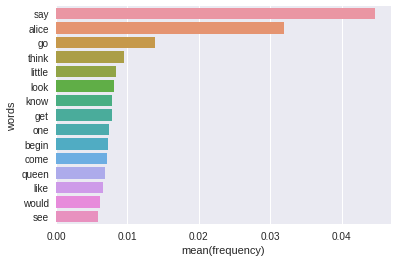

In [93]:
display(ranked_dtm)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


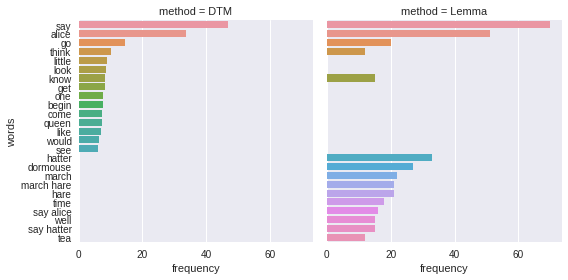

In [94]:
max_freq = max(ranked_lemma)[0] * 15
scaled_dtm = [(freq*max_freq,word) for freq,word in ranked_dtm]
compare(scaled_dtm, ranked_lemma,'DTM', 'Lemma')

# Fuzzy String Matching
useful for typos

# Word Vectors
useful for capturing meaning